In [294]:
# Import packages

# Data Cleaning
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans #For KMeans
from sklearn.cluster import AgglomerativeClustering #hierarchy
import scipy.cluster.hierarchy as sch #hierarchy
from sklearn.cluster import DBSCAN #DBSCAN
%matplotlib inline

# Dimensionality Reduction
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [295]:
# Loading data
nyc = pd.read_csv('clean_data/clustering_data.csv')
nyc.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
0,Bronx,Wakefield,40.894705,-73.847201,10466.0,23,741.608696,3.294118,1.454545,0.0,0.0,0.0,0.0,0.0,0.0,8.857143,0.0,0.0
1,Bronx,Co-op City,40.874294,-73.829939,10475.0,25,749.600000,2.882353,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.631579,0.0,0.0
2,Bronx,Eastchester,40.887556,-73.827806,10466.0,25,554.440000,3.035948,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.166667,0.0,0.0
3,Bronx,Fieldston,40.895437,-73.905643,10471.0,25,875.120000,3.274510,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,13.076923,0.0,0.0
4,Bronx,Riverdale,40.890834,-73.912585,10463.0,25,633.560000,3.431373,1.560000,0.0,0.0,0.0,0.0,0.0,0.0,20.091667,0.0,0.0


# Bronx

In [296]:
bronx = nyc[nyc['Borough'] == 'Bronx']
bronx.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
0,Bronx,Wakefield,40.894705,-73.847201,10466.0,23,741.608696,3.294118,1.454545,0.0,0.0,0.0,0.0,0.0,0.0,8.857143,0.0,0.0
1,Bronx,Co-op City,40.874294,-73.829939,10475.0,25,749.600000,2.882353,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.631579,0.0,0.0
2,Bronx,Eastchester,40.887556,-73.827806,10466.0,25,554.440000,3.035948,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.166667,0.0,0.0
3,Bronx,Fieldston,40.895437,-73.905643,10471.0,25,875.120000,3.274510,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,13.076923,0.0,0.0
4,Bronx,Riverdale,40.890834,-73.912585,10463.0,25,633.560000,3.431373,1.560000,0.0,0.0,0.0,0.0,0.0,0.0,20.091667,0.0,0.0


### To Drop
- Latitude
- Longitude
- Restaurant_Count_Price

We really only need a count of schools, as not a lot of people rate and review schools. Also don't want price to be involved, as it could be an economic indicator

- School_Mean_Reviews
- School_Mean_Rating 
- School_Sum_Reviews 
- School_Sum_Rating 
- School_Sum_Price 

- Park_Sum_Rating

Again, these aren't really things tend people tend to rate & review, but it might be interesting to see how many people review total

- Transit_Mean_Reviews
- Transit_Mean_Rating
- Transit_Sum_Rating
- Grocery_Sum_Rating

These variables don't actually tell us anything
- Uber_Count_Ride Count
- Uber_Mean_Month
- Uber_Mean_Day 


In [297]:
# bronx.drop(columns=['Restaurant_Count_Price','School_Mean_Reviews',
#                     'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
#                    'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
#                    'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
#                    'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
#                    'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
#                    'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
#                    'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
#                    'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [298]:
# bronx.drop(columns=['Borough','Zipcode','Latitude','Longitude','Restaurant_Count_Price','School_Mean_Reviews',
#                     'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
#                    'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
#                    'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
#                    'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
#                    'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
#                    'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
#                    'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
#                    'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [299]:
bronx.fillna(0, inplace=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\1672299214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx.fillna(0, inplace=True)


In [300]:
bronx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       52 non-null     object 
 1   Neighbourhood                 52 non-null     object 
 2   Latitude                      52 non-null     float64
 3   Longitude                     52 non-null     float64
 4   Zipcode                       52 non-null     float64
 5   Restaurant_Count_Name         52 non-null     int64  
 6   Restaurant_Mean_Distance (m)  52 non-null     float64
 7   Restaurant_Mean_Rating        52 non-null     float64
 8   Restaurant_Mean_Price         52 non-null     float64
 9   Restaurant_Sum_Reviews        52 non-null     float64
 10  School_Count_Name             52 non-null     float64
 11  Park_Count_Name               52 non-null     float64
 12  Transit_Count_Name            52 non-null     float64
 13  Grocer

In [301]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(bronx['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
bronx['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(bronx['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
bronx['Neighbourhood_Label'] = Neighbourhood_Labels

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\4079716822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx['Borough_Label'] = Borough_Labels
C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\4079716822.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx['Neighbourhood_Label'] = Neighbourhood_Labels


In [302]:
bronx = bronx[['Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label']]

## Scaling

In [303]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [304]:
df_norm = pd.DataFrame(s_scaler.fit_transform(bronx),columns=bronx.columns)

In [305]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(bronx), columns=bronx.columns)

In [306]:
df_robust = pd.DataFrame(r_scaler.fit_transform(bronx), columns=bronx.columns)

## Elbow Rule

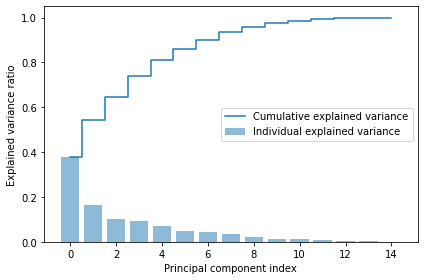

In [307]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [308]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [309]:
df_pca = apply_pca(df_scaled, 5)

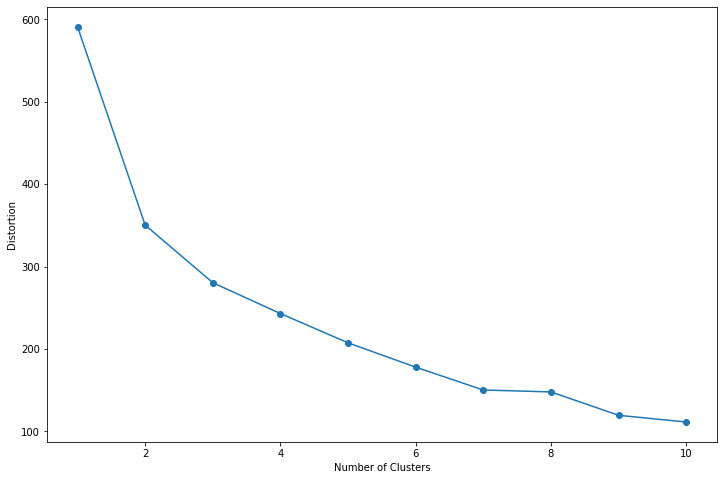

In [310]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

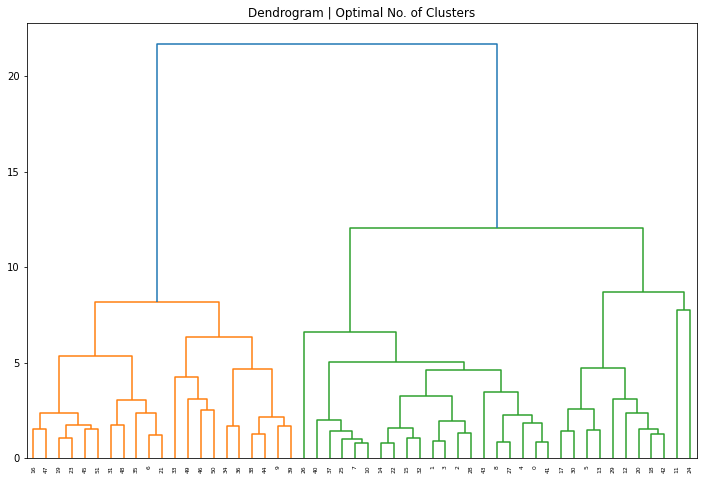

In [311]:
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [312]:
# 3 & 3 clusters

In [313]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [314]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

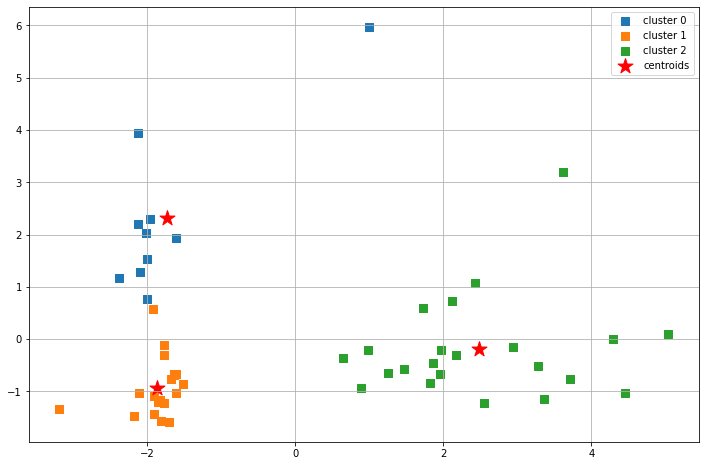

In [315]:
plot_clusters(np.array(df_pca), y_km)

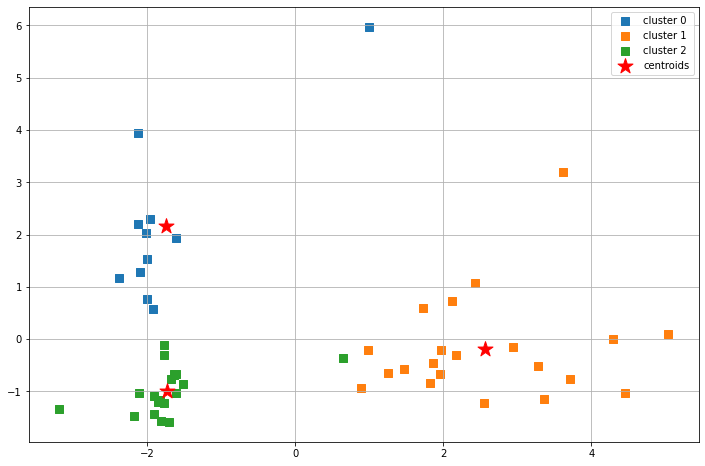

In [316]:
plot_clusters(np.array(X), y_ac)

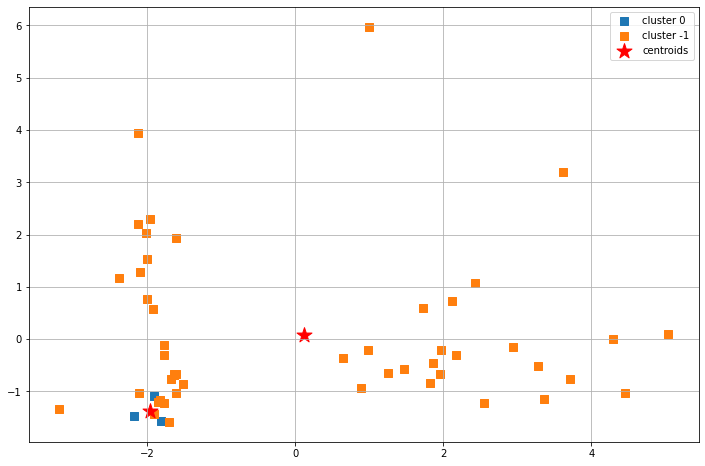

In [317]:
plot_clusters(np.array(X), y_db)

In [318]:
bronx['cluster'] = y_km

In [319]:
bronx_c0 = bronx[bronx['cluster']==0].drop('cluster', axis=1)
bronx_c1 = bronx[bronx['cluster']==1].drop('cluster', axis=1)

In [320]:
df_scaled['cluster'] = y_km

In [321]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [322]:
bronx_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.000000
mean,26.900000,574.349149,3.116180,1.484556,3381.500000,0.500000,0.500000,1.200000,0.100000,0.008619,8.422683,2.600000,1.0,0.0,26.200000
std,6.367452,90.857288,0.465569,0.234657,10693.241908,1.581139,1.581139,3.794733,0.316228,0.005384,3.014614,1.837873,0.0,0.0,17.472518
min,24.000000,455.160000,2.443137,1.291667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000,1.000000,1.0,0.0,2.000000
25%,25.000000,509.450000,2.874811,1.366477,0.000000,0.000000,0.000000,0.000000,0.000000,0.005413,7.259287,1.000000,1.0,0.0,12.250000
50%,25.000000,559.680000,2.998366,1.387500,0.000000,0.000000,0.000000,0.000000,0.000000,0.008815,8.321355,2.000000,1.0,0.0,24.500000
75%,25.000000,665.242917,3.235582,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010743,9.581017,4.000000,1.0,0.0,42.250000
max,45.000000,693.240000,3.949690,2.085714,33815.000000,5.000000,5.000000,12.000000,1.000000,0.020000,12.597561,6.000000,1.0,0.0,49.000000


In [323]:
bronx_clustered = bronx

In [324]:
bronx_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label,cluster
0,23,741.608696,3.294118,1.454545,0.0,0.0,0.0,0.0,0.0,0.000000,8.857143,0.0,0.0,0,47,1
1,25,749.600000,2.882353,1.480000,0.0,0.0,0.0,0.0,0.0,0.000000,9.631579,0.0,0.0,0,9,1
2,25,554.440000,3.035948,1.480000,0.0,0.0,0.0,0.0,0.0,0.000000,9.166667,0.0,0.0,0,14,1
3,25,875.120000,3.274510,1.500000,0.0,0.0,0.0,0.0,0.0,0.000000,13.076923,0.0,0.0,0,17,1
4,25,633.560000,3.431373,1.560000,0.0,0.0,0.0,0.0,0.0,0.000000,20.091667,0.0,0.0,0,39,1
5,25,532.280000,3.839216,1.400000,0.0,0.0,0.0,0.0,0.0,0.010753,6.991039,1.0,1.0,0,21,0
7,80,595.822056,3.638829,1.278689,12558.0,38.0,5.0,32.0,12.0,0.000000,5.864198,2.0,1.0,0,51,2
8,25,552.360000,2.887955,1.320000,0.0,0.0,0.0,0.0,0.0,0.000000,8.842033,0.0,0.0,0,32,1
9,25,672.160000,3.843137,1.500000,0.0,0.0,0.0,0.0,0.0,0.005115,10.964194,0.0,0.0,0,50,1
10,58,633.759419,3.361765,1.568627,27375.0,25.0,7.0,20.0,4.0,0.000000,14.520408,0.0,0.0,0,1,2


In [325]:
bronx.groupby(['cluster']).mean()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
cluster,,,,,,,,,,,,,,,
0,26.900000,574.349149,3.116180,1.484556,3381.500000,0.5,0.500000,1.200000,0.100000,0.008619,8.422683,2.600000,1.000000,0.0,26.200000
1,23.400000,661.337692,3.068590,1.414910,0.000000,0.0,0.000000,0.000000,0.000000,0.002594,8.334522,0.000000,0.000000,0.0,28.850000
2,68.318182,621.222612,3.697878,1.445898,14217.909091,26.0,17.545455,29.590909,11.227273,0.003411,9.021481,0.409091,0.181818,0.0,22.136364


# Staten Island

In [326]:
# Loading data
si = nyc[nyc['Borough'] == 'Staten Island']
si.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
197,Staten Island,St. George,40.644982,-74.079353,10301.0,25,424.52,3.386555,1.708333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,1.0
198,Staten Island,New Brighton,40.640615,-74.087017,10301.0,25,773.08,3.605664,1.428571,0.0,0.0,0.0,0.0,0.0,0.0,13.386473,0.0,0.0
199,Staten Island,Stapleton,40.626928,-74.077902,10301.0,25,402.40,3.239651,1.434783,0.0,0.0,0.0,0.0,0.0,0.0,13.120879,0.0,0.0
200,Staten Island,Rosebank,40.615305,-74.069805,10305.0,25,371.32,3.405229,1.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
201,Staten Island,West Brighton,40.631879,-74.107182,10301.0,25,327.60,3.389850,1.380952,0.0,0.0,0.0,0.0,0.0,0.0,16.811765,0.0,0.0


In [327]:
si.fillna(0, inplace=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\804804297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si.fillna(0, inplace=True)


In [328]:
si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 197 to 305
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       63 non-null     object 
 1   Neighbourhood                 63 non-null     object 
 2   Latitude                      63 non-null     float64
 3   Longitude                     63 non-null     float64
 4   Zipcode                       63 non-null     float64
 5   Restaurant_Count_Name         63 non-null     int64  
 6   Restaurant_Mean_Distance (m)  63 non-null     float64
 7   Restaurant_Mean_Rating        63 non-null     float64
 8   Restaurant_Mean_Price         63 non-null     float64
 9   Restaurant_Sum_Reviews        63 non-null     float64
 10  School_Count_Name             63 non-null     float64
 11  Park_Count_Name               63 non-null     float64
 12  Transit_Count_Name            63 non-null     float64
 13  Groc

In [329]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(si['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
si['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(si['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
si['Neighbourhood_Label'] = Neighbourhood_Labels

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\1554584055.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si['Borough_Label'] = Borough_Labels
C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\1554584055.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si['Neighbourhood_Label'] = Neighbourhood_Labels


In [330]:
si = si[['Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label']]

## Scaling

In [331]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [332]:
df_norm = pd.DataFrame(n_scaler.fit_transform(si),columns=si.columns)

In [333]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(si), columns=si.columns)

In [334]:
df_robust = pd.DataFrame(r_scaler.fit_transform(si), columns=si.columns)

## Elbow Rule

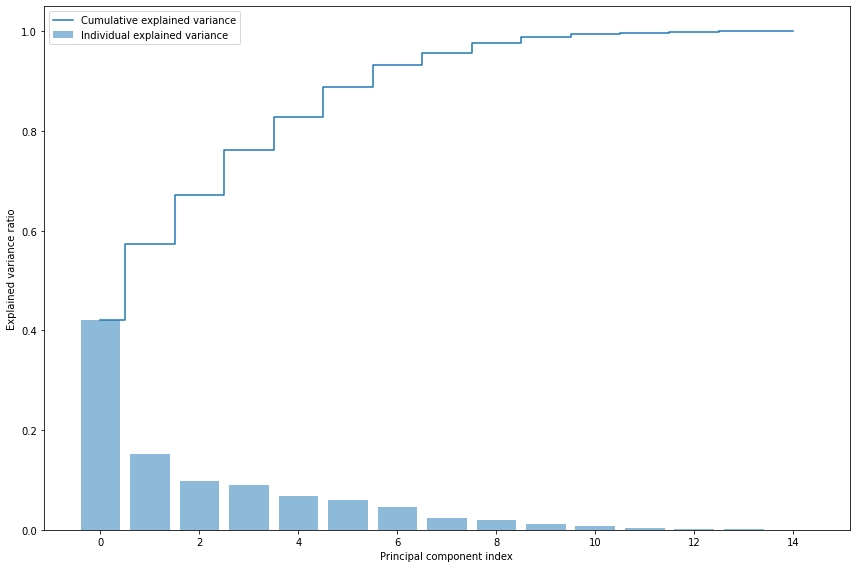

In [335]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [336]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [337]:
df_pca = apply_pca(df_scaled, 5)

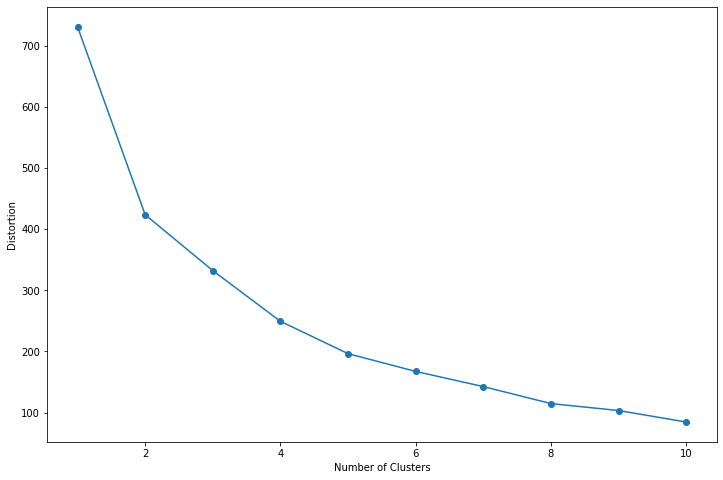

In [338]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

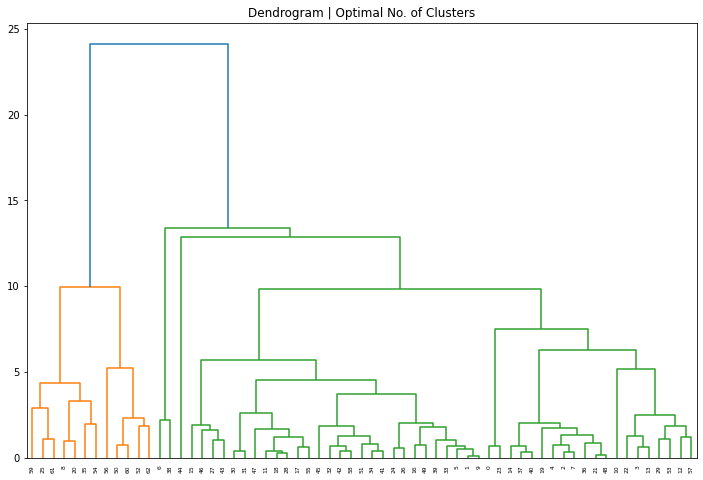

In [339]:
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [340]:
# 3 & 3 clusters

In [341]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [342]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

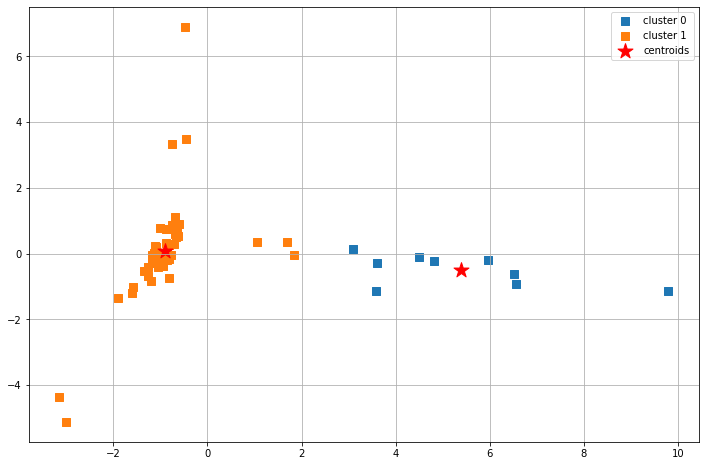

In [343]:
plot_clusters(np.array(df_pca), y_km)

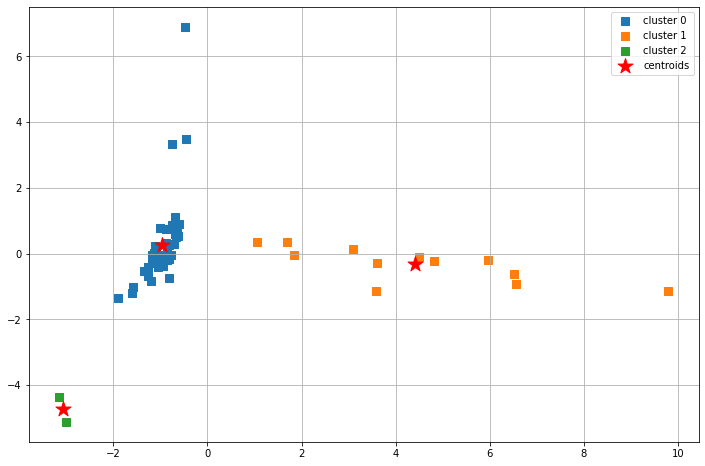

In [344]:
plot_clusters(np.array(X), y_ac)

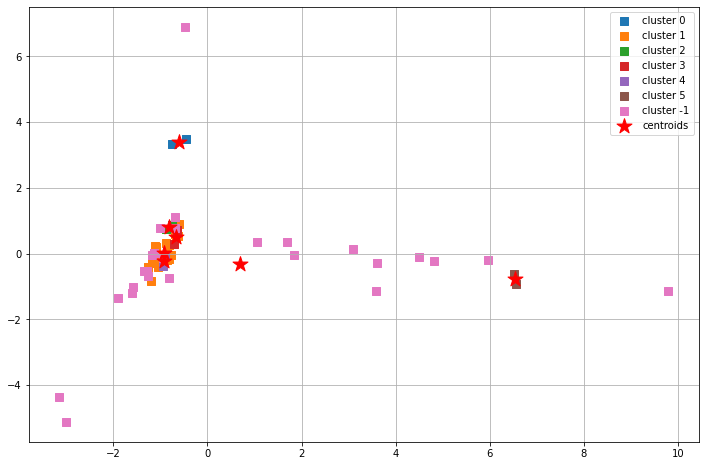

In [345]:
plot_clusters(np.array(X), y_db)

In [346]:
si['cluster'] = y_km

In [347]:
si_c0 = si[si['cluster']==0].drop('cluster', axis=1)
si_c1 = si[si['cluster']==1].drop('cluster', axis=1)

In [348]:
df_scaled['cluster'] = y_km

In [349]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [350]:
si_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.0,9.000000
mean,114.111111,651.602926,3.780890,1.658583,19286.333333,44.888889,21.222222,85.111111,4.666667,0.000682,16.856152,0.0,0.0,0.0,34.777778
std,40.041992,127.955047,0.103971,0.076771,7740.207911,21.951335,9.871395,36.032778,2.549510,0.002045,6.650908,0.0,0.0,0.0,20.437574
min,66.000000,347.037984,3.585043,1.508772,12243.000000,20.000000,8.000000,34.000000,2.000000,0.000000,8.892857,0.0,0.0,0.0,4.000000
25%,94.000000,629.077455,3.746132,1.631579,13935.000000,31.000000,17.000000,70.000000,3.000000,0.000000,12.638037,0.0,0.0,0.0,18.000000
50%,99.000000,686.709373,3.826482,1.683544,17087.000000,41.000000,21.000000,80.000000,4.000000,0.000000,14.449275,0.0,0.0,0.0,42.000000
75%,132.000000,730.124767,3.860477,1.704225,23621.000000,54.000000,25.000000,112.000000,6.000000,0.000000,18.295918,0.0,0.0,0.0,45.000000
max,200.000000,767.231312,3.877587,1.769231,35516.000000,94.000000,41.000000,136.000000,9.000000,0.006135,29.064516,0.0,0.0,0.0,61.000000


In [351]:
si_clustered = si

In [352]:
si_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label,cluster
197,25,424.520000,3.386555,1.708333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.0,1.0,0,52,1
198,25,773.080000,3.605664,1.428571,0.0,0.0,0.0,0.0,0.0,0.000000,13.386473,0.0,0.0,0,32,1
199,25,402.400000,3.239651,1.434783,0.0,0.0,0.0,0.0,0.0,0.000000,13.120879,0.0,0.0,0,53,1
200,25,371.320000,3.405229,1.583333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,46,1
201,25,327.600000,3.389850,1.380952,0.0,0.0,0.0,0.0,0.0,0.000000,16.811765,0.0,0.0,0,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,9,634.777778,2.764706,1.250000,0.0,0.0,0.0,0.0,0.0,0.000000,16.230769,0.0,0.0,0,14,1
291,91,347.037984,3.585043,1.585714,13935.0,39.0,17.0,70.0,2.0,0.000000,29.064516,0.0,0.0,0,42,0
292,132,762.631844,3.757765,1.706522,26044.0,54.0,21.0,125.0,4.0,0.000000,25.600000,0.0,0.0,0,28,0
293,101,637.127779,3.746132,1.683544,17087.0,25.0,25.0,80.0,3.0,0.000000,12.071429,0.0,0.0,0,45,0


In [353]:
si.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
cluster,,,,,,,,,,,,,,,
0,66,767.231312,3.850000,1.508772,12243.0,20.0,8.0,34.0,9.0,0.0,18.295918,0.0,0.0,0,60
1,25,424.520000,3.386555,1.708333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,1.0,0,52


# Queens

In [354]:
# Loading data
queens = nyc[nyc['Borough'] == 'Queens']
queens.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
129,Queens,Astoria,40.768509,-73.915654,11105.0,25,614.680000,4.425882,1.782609,0.0,0.0,0.0,0.0,0.0,0.005479,11.682192,12.0,1.0
130,Queens,Woodside,40.746349,-73.901842,11372.0,25,470.320000,3.735686,1.521739,0.0,0.0,0.0,0.0,3.0,0.003096,10.160991,7.0,1.0
131,Queens,Jackson Heights,40.751981,-73.882821,11372.0,67,616.132372,4.055809,1.833333,34779.0,17.0,20.0,11.0,18.0,0.010563,9.077465,15.0,1.0
132,Queens,Elmhurst,40.744049,-73.881656,11373.0,25,556.520000,4.030588,1.560000,0.0,0.0,0.0,0.0,0.0,0.009174,10.596330,3.0,1.0
133,Queens,Howard Beach,40.654225,-73.838138,11414.0,54,474.089308,3.731336,1.679245,27534.0,17.0,4.0,24.0,2.0,0.000000,12.296296,1.0,1.0


In [355]:
queens.fillna(0, inplace=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\210834369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens.fillna(0, inplace=True)


In [356]:
queens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 129 to 304
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       81 non-null     object 
 1   Neighbourhood                 81 non-null     object 
 2   Latitude                      81 non-null     float64
 3   Longitude                     81 non-null     float64
 4   Zipcode                       81 non-null     float64
 5   Restaurant_Count_Name         81 non-null     int64  
 6   Restaurant_Mean_Distance (m)  81 non-null     float64
 7   Restaurant_Mean_Rating        81 non-null     float64
 8   Restaurant_Mean_Price         81 non-null     float64
 9   Restaurant_Sum_Reviews        81 non-null     float64
 10  School_Count_Name             81 non-null     float64
 11  Park_Count_Name               81 non-null     float64
 12  Transit_Count_Name            81 non-null     float64
 13  Groc

In [357]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(queens['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
queens['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(queens['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
queens['Neighbourhood_Label'] = Neighbourhood_Labels

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\1133394822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens['Borough_Label'] = Borough_Labels
C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\1133394822.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens['Neighbourhood_Label'] = Neighbourhood_Labels


In [358]:
queens = queens[['Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label']]

## Scaling

In [359]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [360]:
df_norm = pd.DataFrame(n_scaler.fit_transform(queens),columns=queens.columns)

In [361]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(queens), columns=queens.columns)

In [362]:
df_robust = pd.DataFrame(r_scaler.fit_transform(queens), columns=queens.columns)

## Elbow Rule

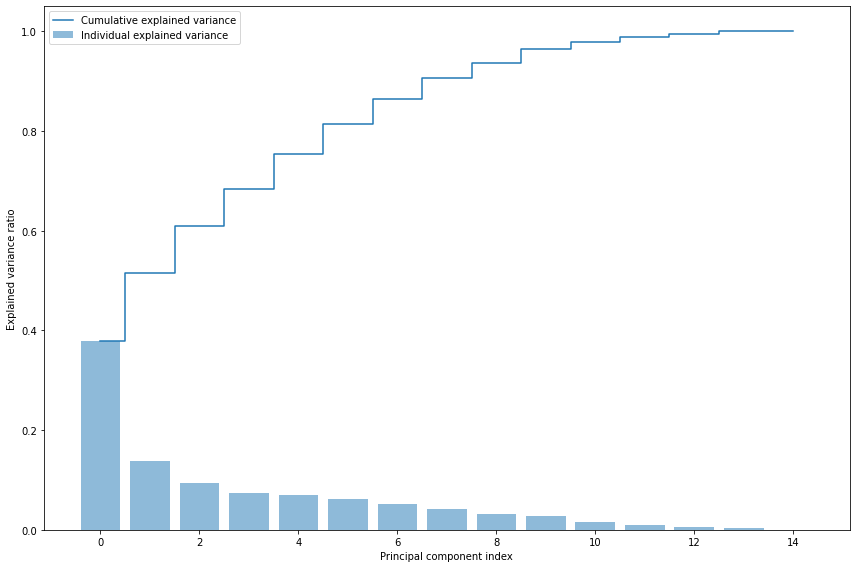

In [363]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [364]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [365]:
df_pca = apply_pca(df_scaled, 5)

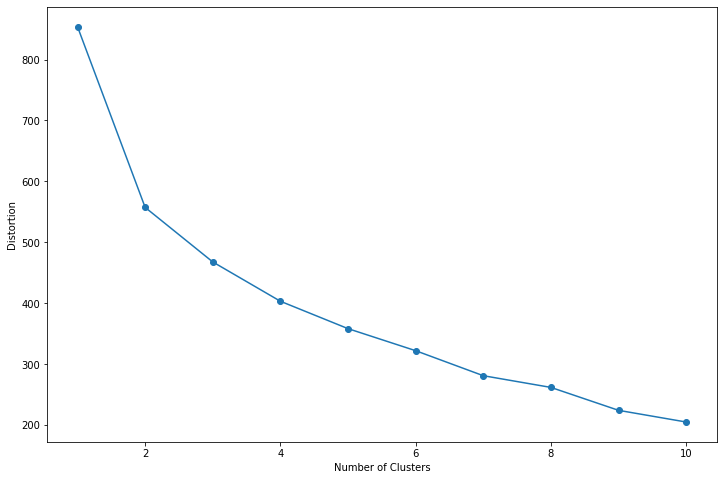

In [366]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

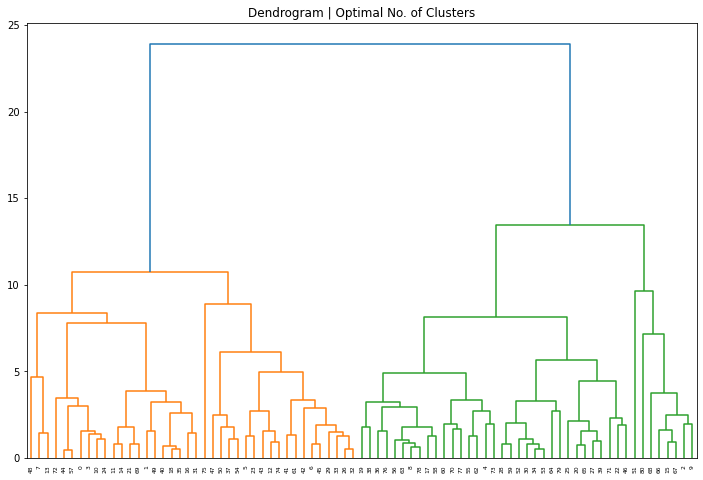

In [367]:
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [368]:
# 3 and 3 clusters

In [369]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [370]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

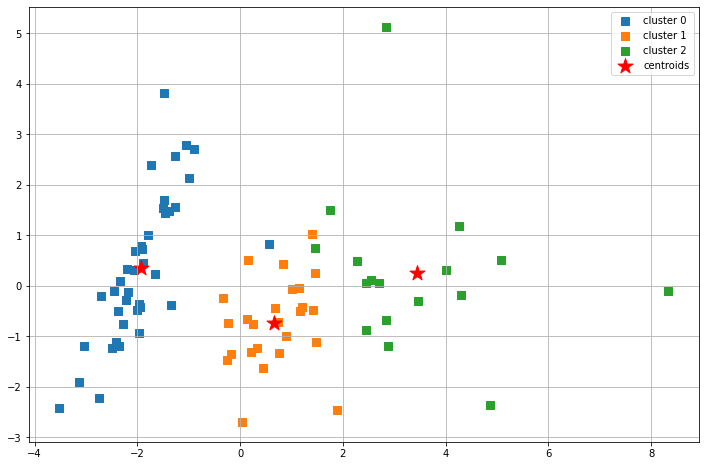

In [371]:
plot_clusters(np.array(df_pca), y_km)

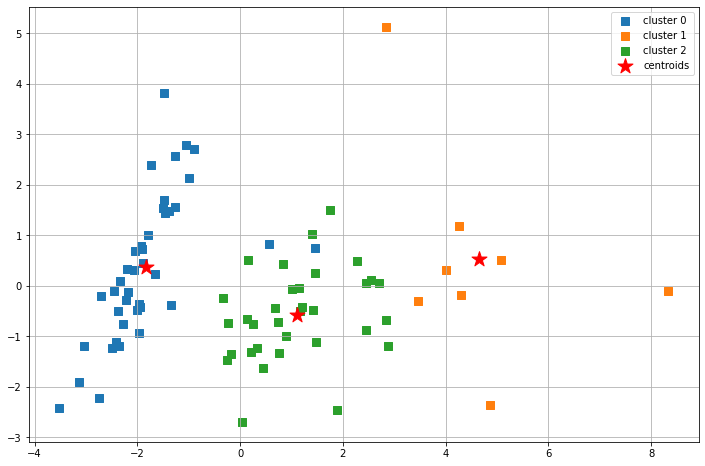

In [372]:
plot_clusters(np.array(X), y_ac)

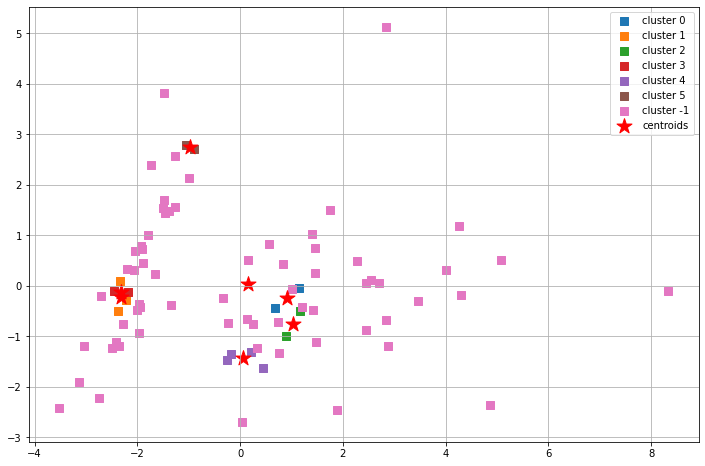

In [373]:
plot_clusters(np.array(X), y_db)

In [374]:
queens['cluster'] = y_km

In [375]:
queens_c0 = queens[queens['cluster']==0].drop('cluster', axis=1)
queens_c1 = queens[queens['cluster']==1].drop('cluster', axis=1)

In [376]:
df_scaled['cluster'] = y_km

In [377]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [378]:
queens_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000
mean,22.923077,577.965725,3.404260,1.504880,302.871795,0.615385,0.333333,0.564103,0.205128,0.003630,15.079541,5.948718,0.512821,0.0,41.307692
std,8.396066,143.704698,0.530330,0.207674,1408.829529,2.357690,1.363690,2.314654,0.656124,0.008253,13.377255,19.202451,0.506370,0.0,25.043282
min,3.000000,171.708333,2.411765,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,24.000000,499.720000,2.986275,1.395652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.105841,0.000000,0.000000,0.0,20.500000
50%,25.000000,614.240000,3.348039,1.487805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.258065,1.000000,1.000000,0.0,41.000000
75%,25.000000,669.340000,3.720042,1.653333,0.000000,0.000000,0.000000,0.000000,0.000000,0.003396,18.524938,2.500000,1.000000,0.0,63.500000
max,45.000000,905.700000,4.425882,1.956522,8511.000000,11.000000,7.000000,14.000000,3.000000,0.037037,77.000000,103.000000,1.000000,0.0,80.000000


In [379]:
queens_clustered = queens

In [380]:
queens_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label,cluster
129,25,614.680000,4.425882,1.782609,0.0,0.0,0.0,0.0,0.0,0.005479,11.682192,12.0,1.0,0,1,0
130,25,470.320000,3.735686,1.521739,0.0,0.0,0.0,0.0,3.0,0.003096,10.160991,7.0,1.0,0,80,0
131,67,616.132372,4.055809,1.833333,34779.0,17.0,20.0,11.0,18.0,0.010563,9.077465,15.0,1.0,0,37,2
132,25,556.520000,4.030588,1.560000,0.0,0.0,0.0,0.0,0.0,0.009174,10.596330,3.0,1.0,0,22,0
133,54,474.089308,3.731336,1.679245,27534.0,17.0,4.0,24.0,2.0,0.000000,12.296296,1.0,1.0,0,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,47,611.313061,3.810521,1.465116,9186.0,20.0,6.0,18.0,3.0,0.008475,11.016949,1.0,1.0,0,50,1
294,71,721.961640,3.859049,1.636364,9295.0,38.0,11.0,44.0,5.0,0.000000,14.578947,0.0,0.0,0,48,2
302,58,631.065083,3.894377,1.408163,9496.0,11.0,17.0,18.0,2.0,0.000000,20.129032,1.0,1.0,0,31,1
303,48,530.510716,3.615948,1.153846,5916.0,32.0,18.0,30.0,10.0,0.000000,8.900000,0.0,0.0,0,6,1


In [381]:
queens.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
cluster,,,,,,,,,,,,,,,
0,25,614.680000,4.425882,1.782609,0.0,0.0,0.0,0.0,0.0,0.005479,11.682192,12.0,1.0,0,1
1,54,474.089308,3.731336,1.679245,27534.0,17.0,4.0,24.0,2.0,0.000000,12.296296,1.0,1.0,0,35
2,67,616.132372,4.055809,1.833333,34779.0,17.0,20.0,11.0,18.0,0.010563,9.077465,15.0,1.0,0,37


# Manhattan

In [382]:
# Loading data
man = nyc[nyc['Borough'] == 'Manhattan']
man.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
6,Manhattan,Marble Hill,40.876551,-73.910660,10034.0,25,639.960000,3.343714,1.280000,0.0,0.0,0.0,0.0,0.0,0.003831,11.666667,0.0,0.0
100,Manhattan,Chinatown,40.715618,-73.994279,10002.0,25,381.080000,4.432157,1.772727,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,28.0,1.0
101,Manhattan,Washington Heights,40.851903,-73.936900,10032.0,33,576.879513,3.757279,1.607143,383.0,4.0,5.0,0.0,1.0,0.001062,7.539278,10.0,1.0
102,Manhattan,Inwood,40.867684,-73.921210,10034.0,62,567.827898,3.748039,1.610169,22149.0,18.0,17.0,16.0,12.0,0.005548,10.592233,19.0,1.0
103,Manhattan,Hamilton Heights,40.823604,-73.949688,10039.0,30,596.365655,3.767059,1.655172,1960.0,2.0,1.0,0.0,3.0,0.002588,9.125971,9.0,1.0


In [383]:
man.fillna(0, inplace=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\3899847069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man.fillna(0, inplace=True)


In [384]:
man.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 6 to 301
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       40 non-null     object 
 1   Neighbourhood                 40 non-null     object 
 2   Latitude                      40 non-null     float64
 3   Longitude                     40 non-null     float64
 4   Zipcode                       40 non-null     float64
 5   Restaurant_Count_Name         40 non-null     int64  
 6   Restaurant_Mean_Distance (m)  40 non-null     float64
 7   Restaurant_Mean_Rating        40 non-null     float64
 8   Restaurant_Mean_Price         40 non-null     float64
 9   Restaurant_Sum_Reviews        40 non-null     float64
 10  School_Count_Name             40 non-null     float64
 11  Park_Count_Name               40 non-null     float64
 12  Transit_Count_Name            40 non-null     float64
 13  Grocer

In [385]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(man['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
man['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(man['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
man['Neighbourhood_Label'] = Neighbourhood_Labels

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\3849990980.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man['Borough_Label'] = Borough_Labels
C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\3849990980.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man['Neighbourhood_Label'] = Neighbourhood_Labels


In [386]:
man = man[['Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label']]

## Scaling

In [387]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [388]:
df_norm = pd.DataFrame(n_scaler.fit_transform(man),columns=man.columns)

In [389]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(man), columns=man.columns)

In [390]:
df_robust = pd.DataFrame(r_scaler.fit_transform(man), columns=man.columns)

## Elbow Rule

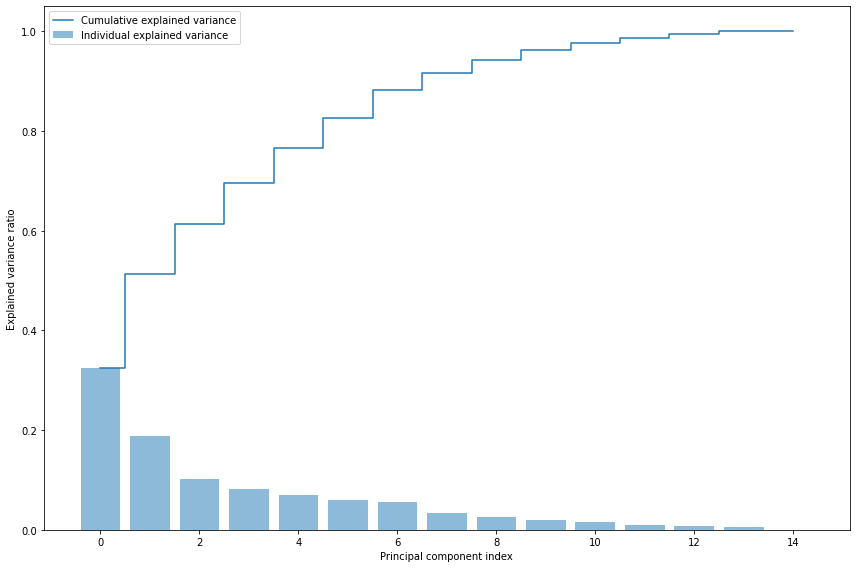

In [391]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [392]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [393]:
df_pca = apply_pca(df_scaled, 5)

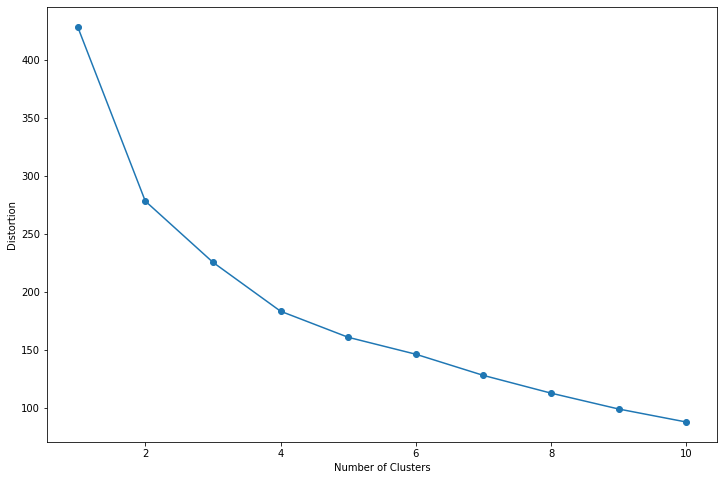

In [394]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

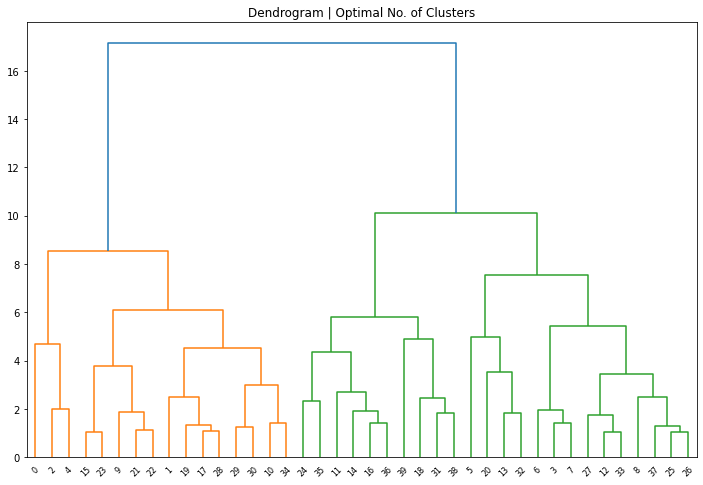

In [395]:
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [396]:
# 3 and 3 clusters

In [397]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [398]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

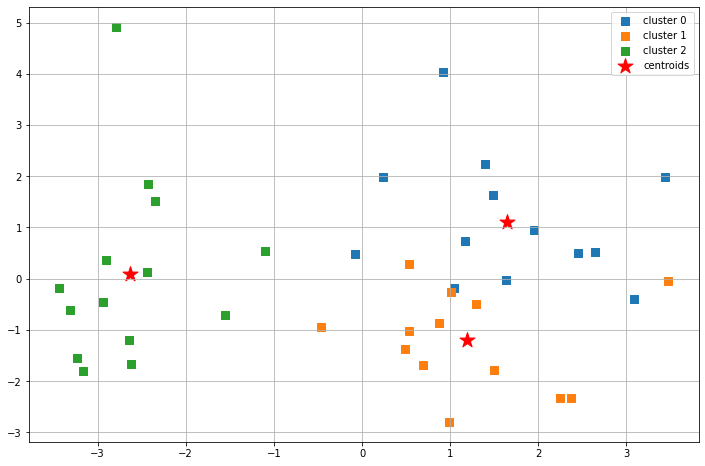

In [399]:
plot_clusters(np.array(df_pca), y_km)

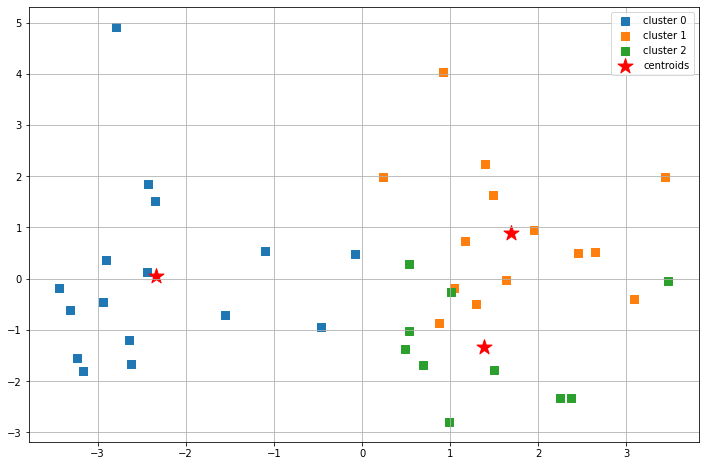

In [400]:
plot_clusters(np.array(X), y_ac)

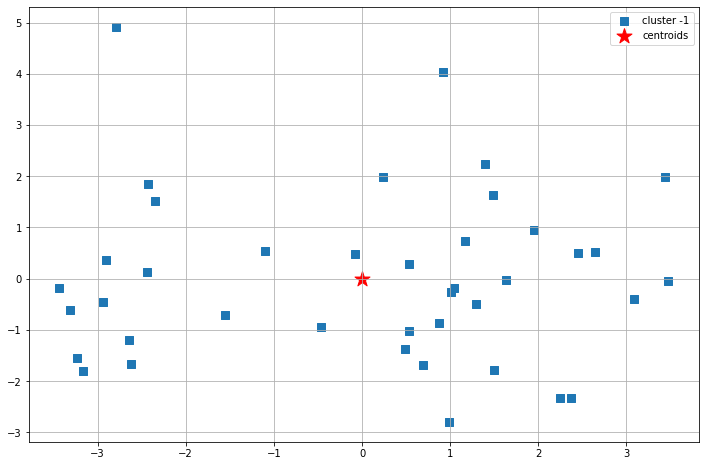

In [401]:
plot_clusters(np.array(X), y_db)

In [402]:
man['cluster'] = y_km

In [403]:
man_c0 = man[man['cluster']==0].drop('cluster', axis=1)
man_c1 = man[man['cluster']==1].drop('cluster', axis=1)

In [404]:
df_scaled['cluster'] = y_km

In [405]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [406]:
man_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000
mean,51.923077,535.685668,4.103665,1.907940,32304.153846,16.230769,18.615385,23.153846,11.076923,0.008944,10.544357,90.769231,0.846154,0.0,16.000000
std,10.420025,74.809463,0.168787,0.234835,19482.045935,5.356520,7.263361,9.590326,2.465142,0.010394,1.625155,99.996795,0.375534,0.0,10.559356
min,35.000000,421.499326,3.748039,1.610169,12651.000000,8.000000,8.000000,10.000000,8.000000,0.000000,7.634328,0.000000,0.000000,0.0,1.000000
25%,45.000000,484.775602,4.018649,1.750000,19482.000000,14.000000,15.000000,16.000000,9.000000,0.002311,10.066632,6.000000,1.000000,0.0,7.000000
50%,53.000000,545.428211,4.138572,1.847826,27350.000000,15.000000,17.000000,20.000000,10.000000,0.004950,10.560414,61.000000,1.000000,0.0,17.000000
75%,62.000000,612.418397,4.240474,2.075472,33231.000000,19.000000,21.000000,29.000000,12.000000,0.009354,11.332911,159.000000,1.000000,0.0,21.000000
max,66.000000,633.073216,4.279055,2.342105,73147.000000,28.000000,34.000000,41.000000,15.000000,0.033582,13.785223,295.000000,1.000000,0.0,35.000000


In [407]:
man_clustered = man

In [408]:
man_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label,cluster
6,25,639.960000,3.343714,1.280000,0.0,0.0,0.0,0.0,0.0,0.003831,11.666667,0.0,0.0,0,22,2
100,25,381.080000,4.432157,1.772727,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,28.0,1.0,0,4,2
101,33,576.879513,3.757279,1.607143,383.0,4.0,5.0,0.0,1.0,0.001062,7.539278,10.0,1.0,0,37,2
102,62,567.827898,3.748039,1.610169,22149.0,18.0,17.0,16.0,12.0,0.005548,10.592233,19.0,1.0,0,15,0
103,30,596.365655,3.767059,1.655172,1960.0,2.0,1.0,0.0,3.0,0.002588,9.125971,9.0,1.0,0,13,2
104,49,518.471453,3.889476,1.844444,12651.0,10.0,18.0,18.0,8.0,0.033582,7.634328,0.0,0.0,0,21,0
105,40,545.428211,3.900588,1.710526,17646.0,14.0,16.0,10.0,10.0,0.007808,10.066632,24.0,1.0,0,2,0
106,45,618.768004,4.018649,1.627907,16336.0,19.0,34.0,14.0,12.0,0.000000,9.124394,6.0,1.0,0,7,0
107,53,453.160000,4.240474,2.075472,24647.0,28.0,31.0,38.0,10.0,0.004950,10.212871,295.0,1.0,0,35,0
108,25,434.520000,4.290980,1.760000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,178.0,1.0,0,39,2


In [409]:
man.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
cluster,,,,,,,,,,,,,,,
0,62,567.827898,3.748039,1.610169,22149.0,18.0,17.0,16.0,12.0,0.005548,10.592233,19.0,1.0,0,15
1,63,1097.814869,4.174697,1.709677,22473.0,14.0,6.0,14.0,12.0,0.000000,0.000000,1.0,1.0,0,28
2,25,639.960000,3.343714,1.280000,0.0,0.0,0.0,0.0,0.0,0.003831,11.666667,0.0,0.0,0,22


# Brooklyn

In [410]:
# Loading data
brooklyn = nyc[nyc['Borough'] == 'Brooklyn']
brooklyn.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
46,Brooklyn,Bay Ridge,40.625801,-74.030621,11209.0,25,562.640000,3.760784,1.920000,0.0,0.0,0.0,0.0,0.0,0.000000,9.810056,0.0,0.0
47,Brooklyn,Bensonhurst,40.611009,-73.995180,11214.0,25,654.720000,3.186851,1.363636,0.0,0.0,0.0,0.0,0.0,0.000000,13.696970,0.0,0.0
48,Brooklyn,Sunset Park,40.645103,-74.010316,11220.0,47,584.041121,3.865175,1.369565,12112.0,20.0,3.0,17.0,19.0,0.004706,12.428235,0.0,0.0
49,Brooklyn,Greenpoint,40.730201,-73.954241,11222.0,59,359.651803,4.343436,1.810345,17627.0,19.0,19.0,15.0,9.0,0.001718,14.893471,81.0,1.0
50,Brooklyn,Gravesend,40.595260,-73.973471,11223.0,88,597.882431,3.961856,1.577465,30472.0,30.0,14.0,23.0,12.0,0.000000,18.913043,0.0,0.0


In [411]:
brooklyn.fillna(0, inplace=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\3107032623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn.fillna(0, inplace=True)


In [412]:
brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 46 to 300
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       70 non-null     object 
 1   Neighbourhood                 70 non-null     object 
 2   Latitude                      70 non-null     float64
 3   Longitude                     70 non-null     float64
 4   Zipcode                       70 non-null     float64
 5   Restaurant_Count_Name         70 non-null     int64  
 6   Restaurant_Mean_Distance (m)  70 non-null     float64
 7   Restaurant_Mean_Rating        70 non-null     float64
 8   Restaurant_Mean_Price         70 non-null     float64
 9   Restaurant_Sum_Reviews        70 non-null     float64
 10  School_Count_Name             70 non-null     float64
 11  Park_Count_Name               70 non-null     float64
 12  Transit_Count_Name            70 non-null     float64
 13  Groce

In [413]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(brooklyn['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
brooklyn['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(brooklyn['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
brooklyn['Neighbourhood_Label'] = Neighbourhood_Labels

brooklyn = brooklyn[['Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label']]

C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\1899927998.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['Borough_Label'] = Borough_Labels
C:\Users\joshu\AppData\Local\Temp\ipykernel_24968\1899927998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['Neighbourhood_Label'] = Neighbourhood_Labels


In [414]:
brooklyn = brooklyn[['Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label']]

## Scaling

In [415]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [416]:
df_norm = pd.DataFrame(n_scaler.fit_transform(brooklyn),columns=brooklyn.columns)

In [417]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(brooklyn), columns=brooklyn.columns)

In [418]:
df_robust = pd.DataFrame(r_scaler.fit_transform(brooklyn), columns=brooklyn.columns)

## Elbow Rule

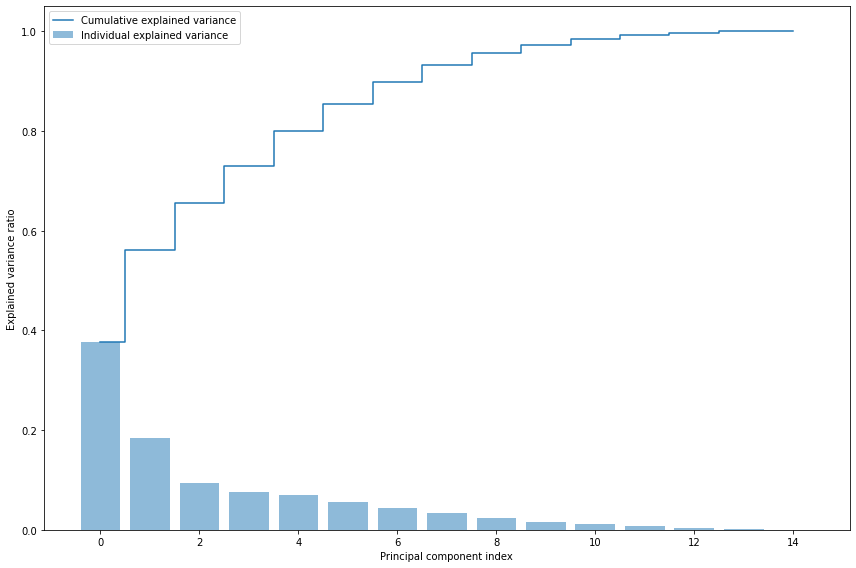

In [419]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [420]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [421]:
df_pca = apply_pca(df_scaled, 5)

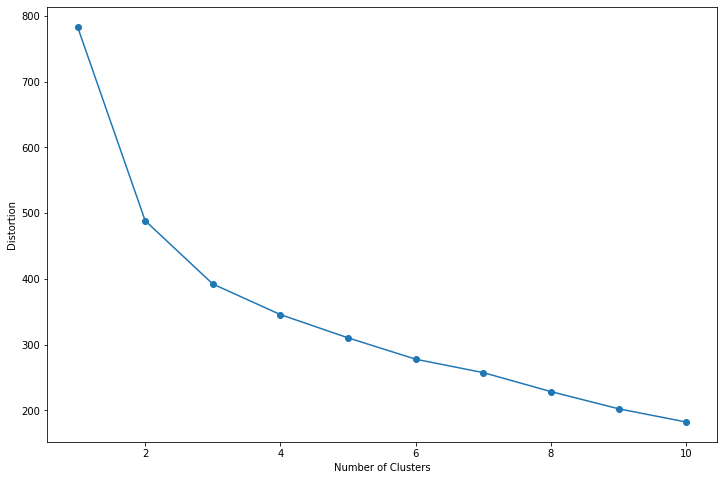

In [422]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

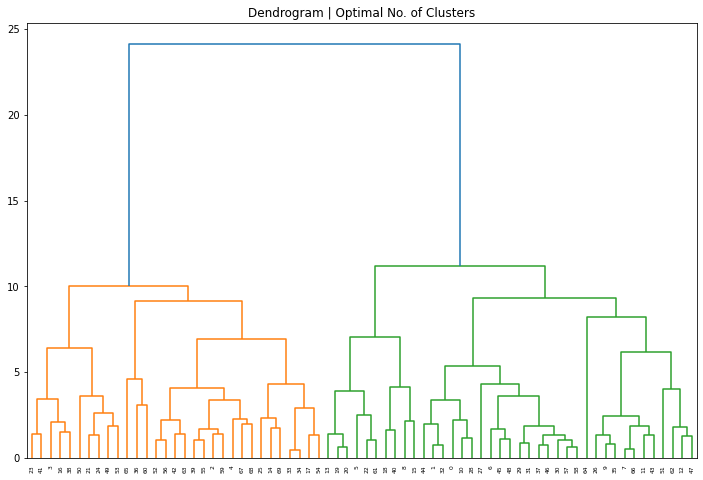

In [423]:
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [424]:
# 3 and 3 clusters

In [425]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [426]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

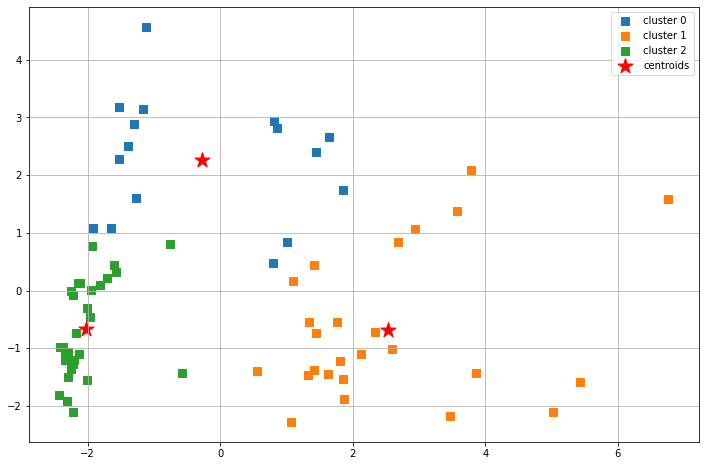

In [427]:
plot_clusters(np.array(df_pca), y_km)

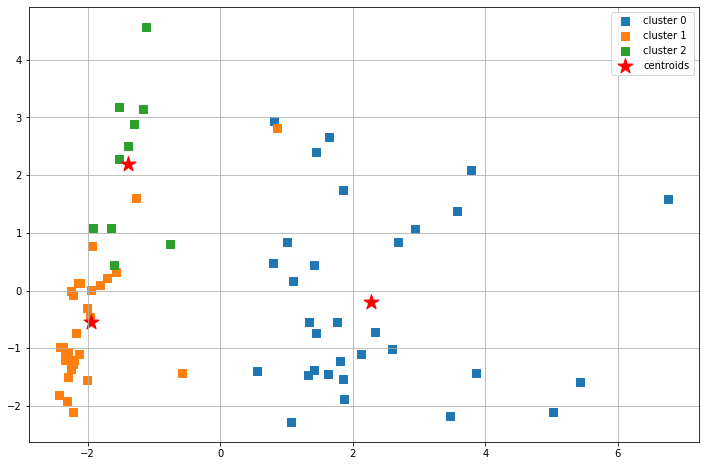

In [428]:
plot_clusters(np.array(X), y_ac)

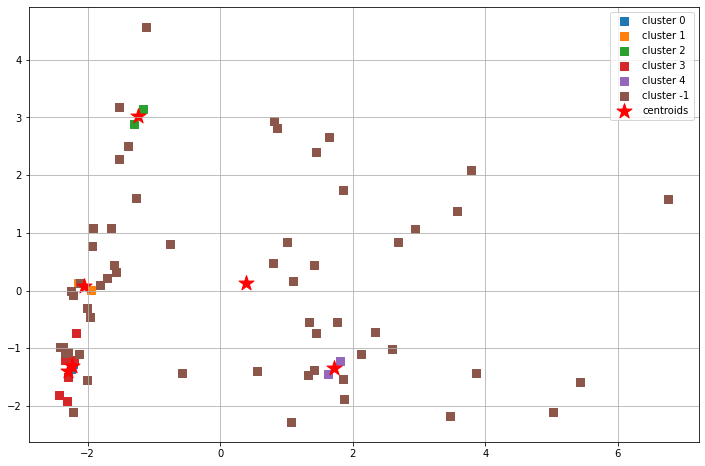

In [429]:
plot_clusters(np.array(X), y_db)

In [430]:
brooklyn['cluster'] = y_km

In [431]:
brooklyn_c0 = brooklyn[brooklyn['cluster']==0].drop('cluster', axis=1)
brooklyn_c1 = brooklyn[brooklyn['cluster']==1].drop('cluster', axis=1)

In [432]:
df_scaled['cluster'] = y_km

In [433]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [434]:
brooklyn_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.0,16.000000
mean,38.062500,471.569174,4.233223,1.872256,8269.312500,5.93750,6.687500,6.250000,4.625000,0.001324,10.835019,42.312500,0.9375,0.0,31.187500
std,16.254102,103.375872,0.285238,0.191854,11299.334716,7.52302,8.451578,8.520563,5.840947,0.001520,6.781209,40.366188,0.2500,0.0,22.503981
min,25.000000,338.960000,3.268908,1.478261,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,5.000000
25%,25.000000,388.377117,4.208963,1.781250,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.603984,4.500000,1.0000,0.0,12.500000
50%,25.000000,451.140000,4.314218,1.916722,0.000000,0.00000,0.000000,0.000000,0.000000,0.000796,12.850918,39.000000,1.0000,0.0,25.500000
75%,50.750000,535.406616,4.392941,2.000000,15407.750000,12.25000,15.000000,15.250000,9.000000,0.002205,15.046843,69.500000,1.0000,0.0,54.250000
max,65.000000,666.684355,4.457255,2.160000,29890.000000,19.00000,19.000000,22.000000,17.000000,0.004144,19.798146,127.000000,1.0000,0.0,67.000000


In [435]:
brooklyn_clustered = brooklyn

In [436]:
brooklyn_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label,cluster
46,25,562.640000,3.760784,1.920000,0.0,0.0,0.0,0.0,0.0,0.000000,9.810056,0.0,0.0,0,1,2
47,25,654.720000,3.186851,1.363636,0.0,0.0,0.0,0.0,0.0,0.000000,13.696970,0.0,0.0,0,3,2
48,47,584.041121,3.865175,1.369565,12112.0,20.0,3.0,17.0,19.0,0.004706,12.428235,0.0,0.0,0,64,1
49,59,359.651803,4.343436,1.810345,17627.0,19.0,19.0,15.0,9.0,0.001718,14.893471,81.0,1.0,0,37,0
50,88,597.882431,3.961856,1.577465,30472.0,30.0,14.0,23.0,12.0,0.000000,18.913043,0.0,0.0,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,122,631.362280,4.086647,1.939130,74115.0,47.0,47.0,62.0,13.0,0.004785,14.593301,102.0,1.0,0,22,1
289,25,394.440000,2.782135,1.590909,0.0,0.0,0.0,0.0,0.0,0.009091,10.654545,1.0,1.0,0,39,2
295,95,701.682552,3.631943,1.380282,20237.0,37.0,42.0,39.0,18.0,0.000000,14.167722,0.0,0.0,0,38,1
296,89,704.990224,3.793099,1.512821,18620.0,33.0,9.0,24.0,17.0,0.013889,12.097222,0.0,0.0,0,41,1


In [437]:
brooklyn.groupby(['cluster']).first()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
cluster,,,,,,,,,,,,,,,
0,59,359.651803,4.343436,1.810345,17627.0,19.0,19.0,15.0,9.0,0.001718,14.893471,81.0,1.0,0,37
1,47,584.041121,3.865175,1.369565,12112.0,20.0,3.0,17.0,19.0,0.004706,12.428235,0.0,0.0,0,64
2,25,562.640000,3.760784,1.920000,0.0,0.0,0.0,0.0,0.0,0.000000,9.810056,0.0,0.0,0,1
